In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np

In [2]:
df = pd.read_csv('./assignments_from_pool_Quality_4.tsv', sep="\t")

In [3]:
df = df.drop(columns=['GOLDEN:ad', 'GOLDEN:not_ad', 'GOLDEN:ban_insult_hard', 'GOLDEN:ban_shock_content', 'GOLDEN:ban_shock_content',
'HINT:text', 'HINT:default_language'])


In [4]:
df = df.fillna(0)
def f(row):
    if row['OUTPUT:ad'] == 'yes':
        val = 'ad'
    elif row['OUTPUT:not_ad'] != 0:
        val = 'not_ad'
    elif row['OUTPUT:ban_insult_hard'] != 0:
        val = 'ban_insult_hard'
    elif row['OUTPUT:ban_shock_content'] != 0:
        val = 'ban_shock_content'    
    else:
        val = ' '
    return val

df['OUTPUT:label'] = df.apply(f, axis=1)



In [5]:
df.head()

,INPUT:label,INPUT:comment,INPUT:task-id,OUTPUT:ad,OUTPUT:not_ad,OUTPUT:ban_insult_hard,OUTPUT:ban_shock_content,ASSIGNMENT:worker_id,OUTPUT:label
0,ad,Центр Скупки. Центр Скупки предоставляет услуг...,70,yes,0,0,0,0186400b77dcfad3fd78b2c08981ebd8,ad
1,ban_shock_content,Убили котика у ТЕЦ на Бирюлево 3к2. Сегодня н...,366,no,0,0,True,0186400b77dcfad3fd78b2c08981ebd8,ban_shock_content
2,not_ad,"Увидел, как в Кашкадане на месте озера возится...",489,no,True,0,0,0186400b77dcfad3fd78b2c08981ebd8,not_ad
3,ban_insult_hard,Простите но наши врачище! бараны!!! -тупые в б...,294,no,0,True,0,0186400b77dcfad3fd78b2c08981ebd8,ban_insult_hard
4,not_ad,"Татьянка Борисова рассказывает, что на Коровин...",446,no,True,0,0,0186400b77dcfad3fd78b2c08981ebd8,not_ad


In [6]:
df = df.drop(columns=['OUTPUT:ad', 'OUTPUT:not_ad', 'OUTPUT:ban_insult_hard', 'OUTPUT:ban_shock_content'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   INPUT:label           1953 non-null   object
 1   INPUT:comment         1953 non-null   object
 2   INPUT:task-id         1953 non-null   int64 
 3   ASSIGNMENT:worker_id  1953 non-null   object
 4   OUTPUT:label          1953 non-null   object
dtypes: int64(1), object(4)
memory usage: 76.4+ KB


In [8]:
#сохранения в tsv
df.to_csv('Quality_4.tsv', sep="\t", index=False)

In [9]:
df[df['INPUT:label'] == df['OUTPUT:label']].count()[0]

1755

In [10]:
df[df['INPUT:label'] != df['OUTPUT:label']].count()[0]

198

In [16]:
# 10% неправильных ответов
df[df['INPUT:label'] != df['OUTPUT:label']].count()[0]/df.count()[0]

0.10138248847926268

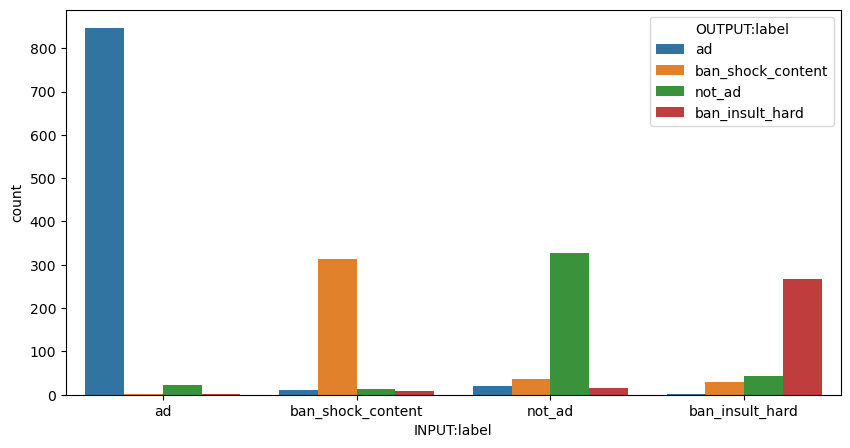

In [12]:
# 
_, axes = plt.subplots(1, sharey=True, figsize=(10,5))


sns.countplot(x='INPUT:label', hue='OUTPUT:label', data=df);

In [13]:
df[(df['INPUT:label'] != df['OUTPUT:label']) & (df['INPUT:label'] == 'ad')]

,INPUT:label,INPUT:comment,INPUT:task-id,ASSIGNMENT:worker_id,OUTPUT:label
7,ad,Дизайн проект. Дизайн проект состоит из: 1. Ан...,189,55c8ccb7c8eec80f7c17e74f36fb5453,not_ad
99,ad,Ленинградская область. Эльбрус Удаление деревь...,6,7d36240662e27b95b61575138e1088a2,not_ad
154,ad,"ЖК ""Джаз"". Вторая очередь. Скоро.. Началось ст...",198,0186400b77dcfad3fd78b2c08981ebd8,not_ad
233,ad,Выберете ли Вы в качестве подарка - Фотомозаик...,188,d6bab13aab22980c61e53025a05ea2e0,not_ad
250,ad,"Где заказываете крауд-ссылки?. Поделитесь, кто...",84,0186400b77dcfad3fd78b2c08981ebd8,not_ad
298,ad,Road to Jedi. Иллюминаты захватили мир? Попроб...,123,de03cc3542ba3f30548168ef644c4de8,ban_insult_hard
306,ad,Road to Jedi. Иллюминаты захватили мир? Попроб...,123,0186400b77dcfad3fd78b2c08981ebd8,not_ad
330,ad,"Где заказываете крауд-ссылки?. Поделитесь, кто...",84,6a9db0bac8daa328d10d09b73e2fcfa7,not_ad
693,ad,Дизайн проект. Дизайн проект состоит из: 1. Ан...,189,37381e101d96c03972d9413100c9a652,not_ad
858,ad,"Пост от 24.05. Почему нас долго не было, спрос...",151,6a9db0bac8daa328d10d09b73e2fcfa7,not_ad
